# Increasing the norm of the shear of a real galaxy

#### The aim is to create an animation (.gif for example) with the output .png files

In [1]:
import galsim
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#(optional) set the text font to Latex font. 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer modern"],  # You can change the serif font here if needed
    "axes.labelsize": 14,     # Adjust as needed
    "axes.linewidth": 0.5,    # Adjust line width if necessary
    "xtick.labelsize": 12,    # Adjust tick label size
    "ytick.labelsize": 12,    # Adjust tick label size
    "legend.fontsize": 14,    # Adjust legend font size
    "legend.handlelength": 2.0
})

In [3]:
#define the parameters of the galaxy

random_seed = galsim.BaseDeviate(1512413).raw()
sky_level = 2.5e3        # ADU / arcsec^2
pixel_scale = 0.26      # arcsec
gal_flux = 1.e5         # arbitrary choice, makes nice (not too) noisy images
gal_g1 = 0.00            #
gal_g2 = 0              #
gal_mu = 1.082          # mu = ( (1-kappa)^2 - g1^2 - g2^2 )^-1
psf_inner_fwhm = 0.6    # arcsec
psf_outer_fwhm = 2.3    # arcsec
psf_inner_fraction = 0.8  # fraction of total PSF flux in the inner Gaussian (FLUX)
psf_outer_fraction = 0.2  # fraction of total PSF flux in the inner Gaussian

index = 1

g1_max = 1 

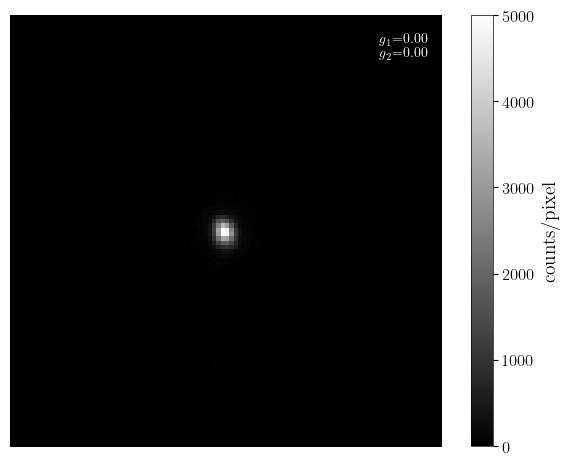

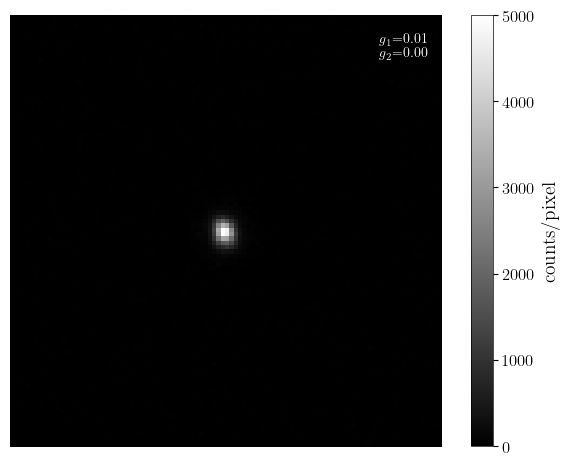

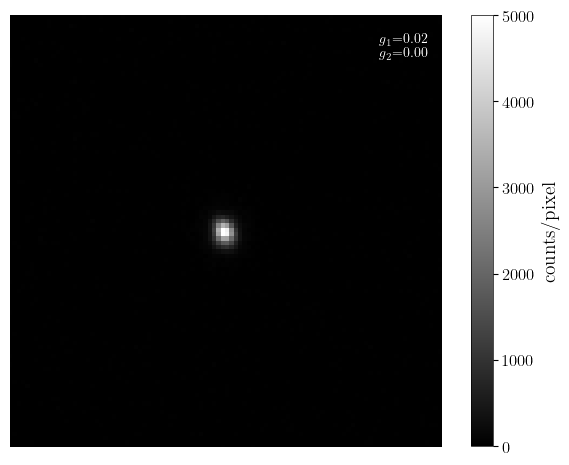

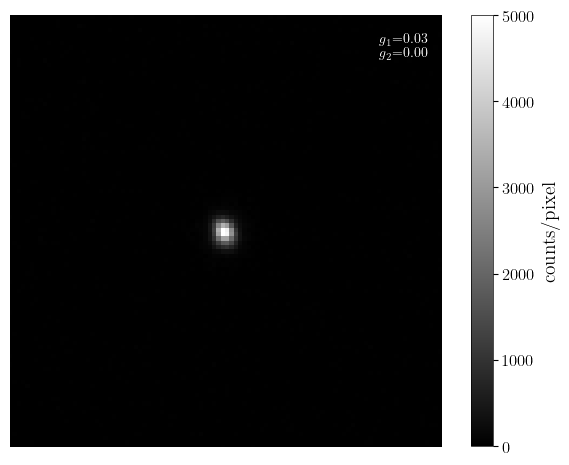

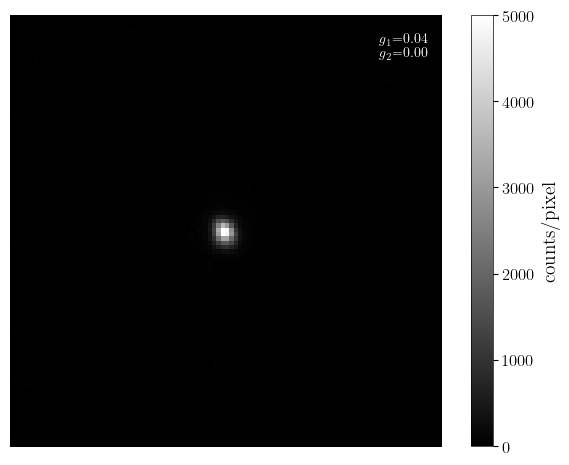

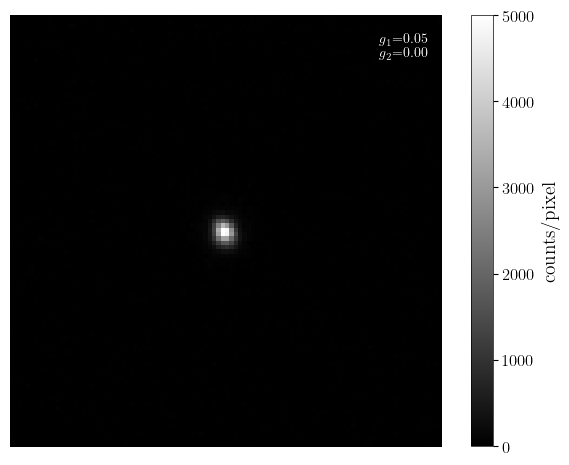

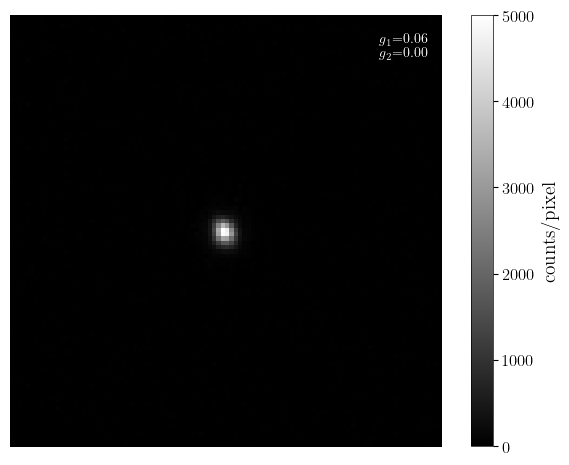

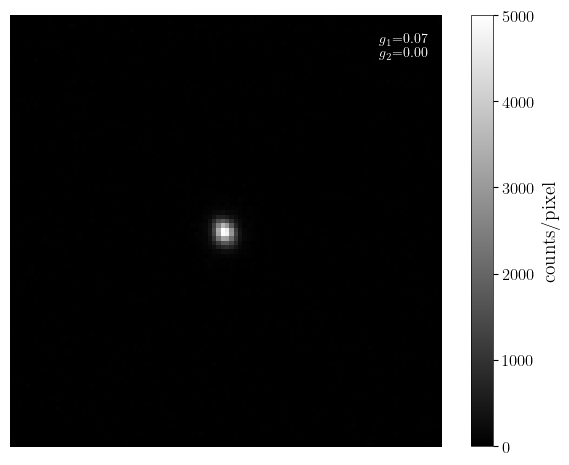

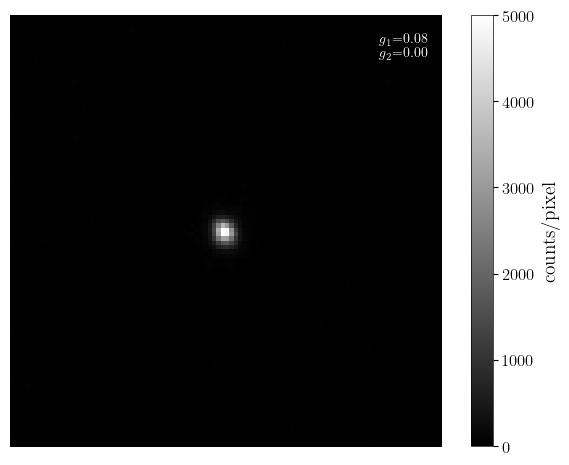

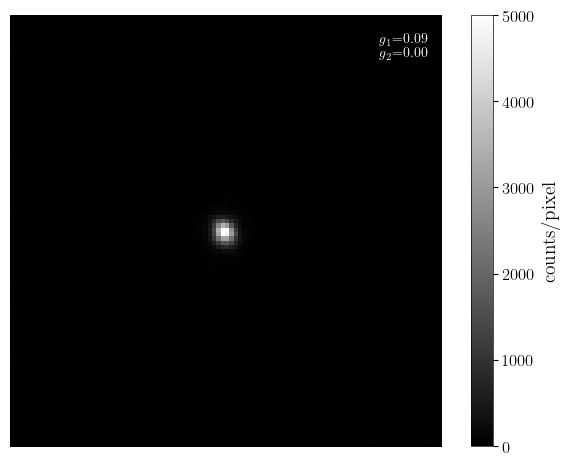

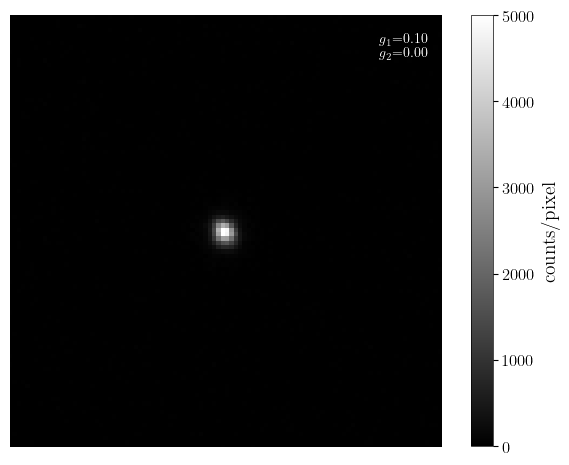

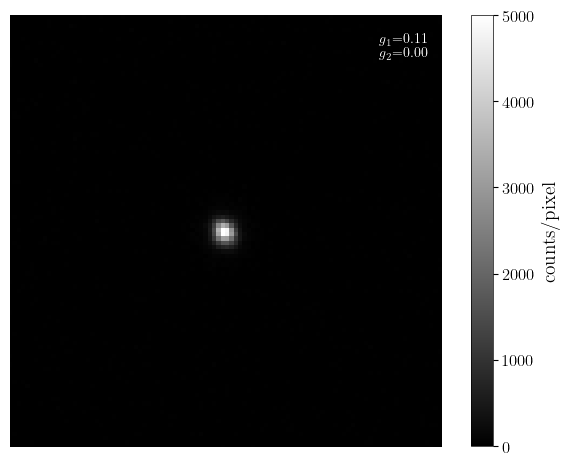

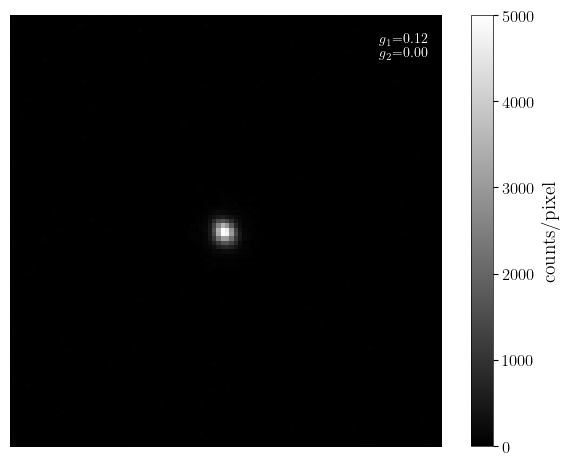

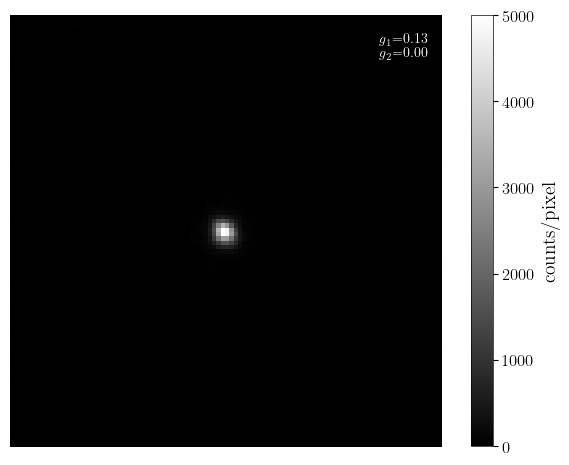

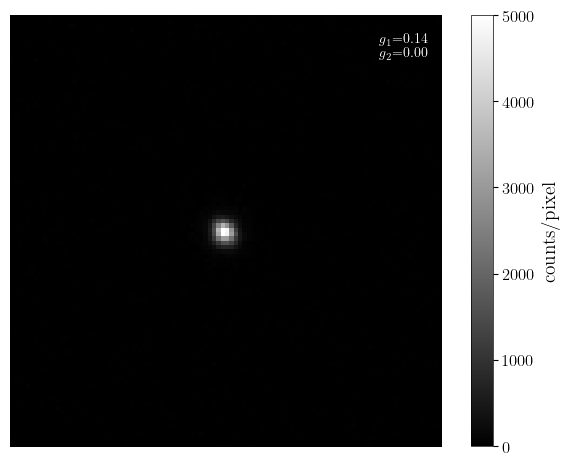

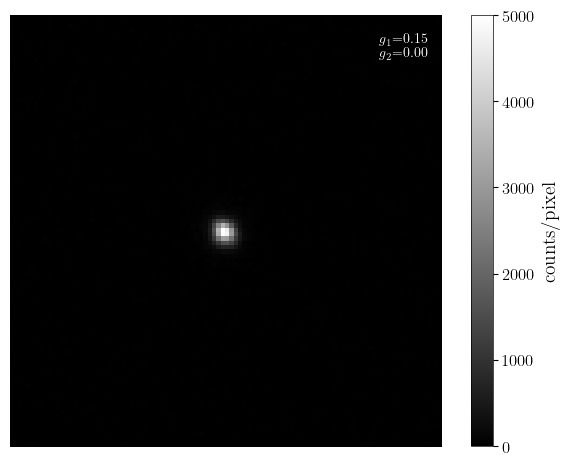

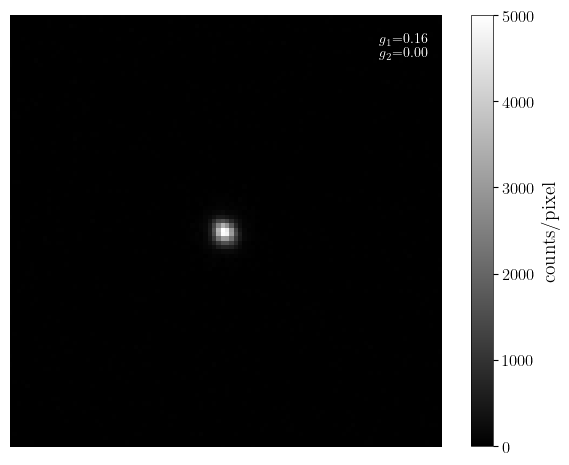

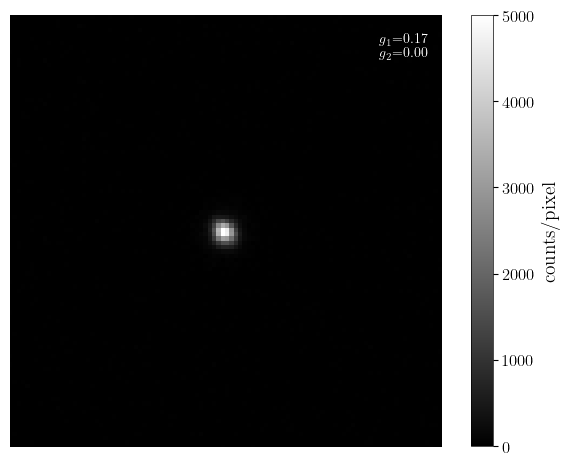

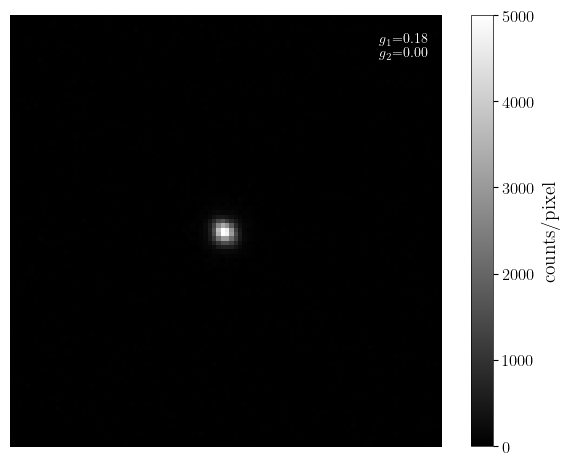

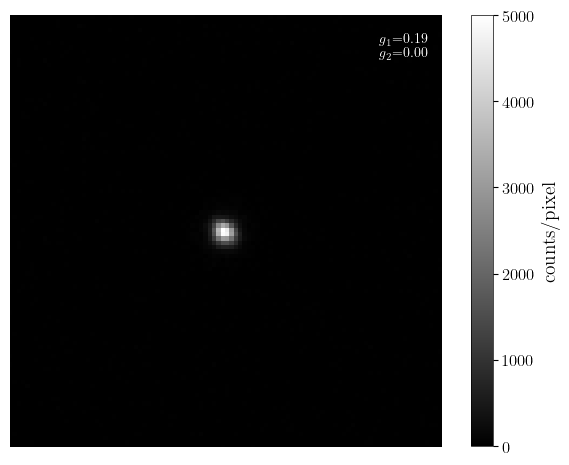

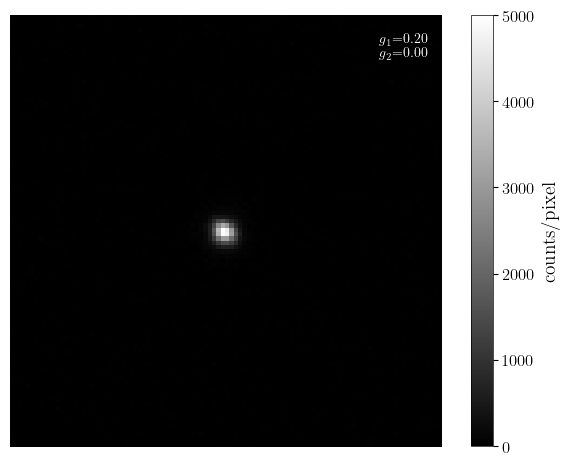

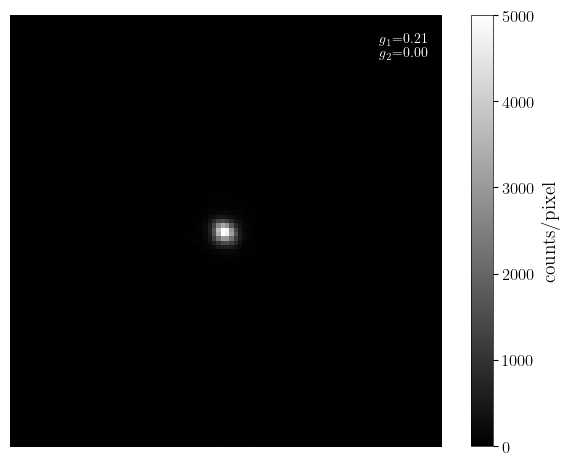

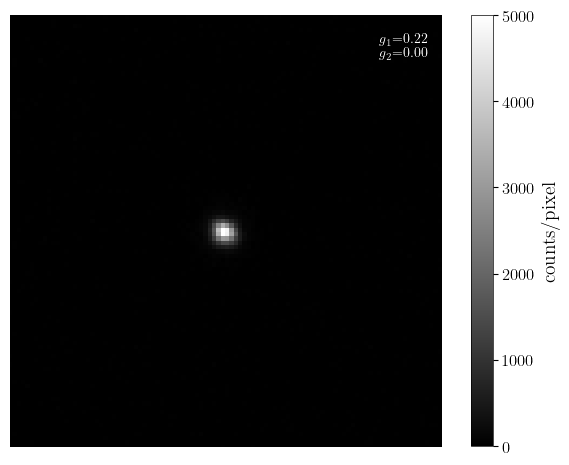

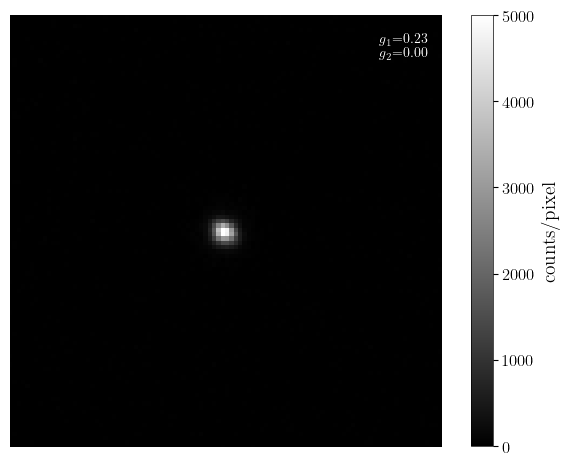

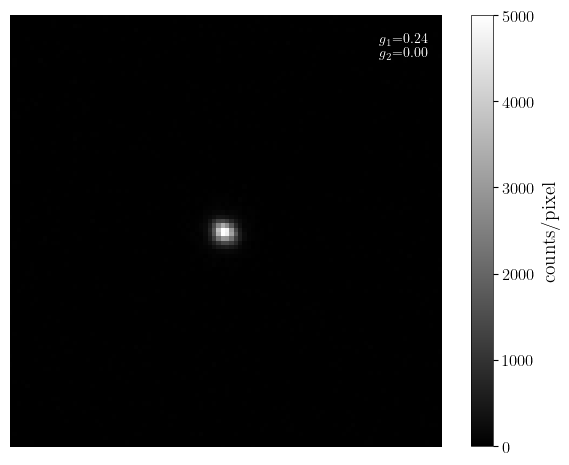

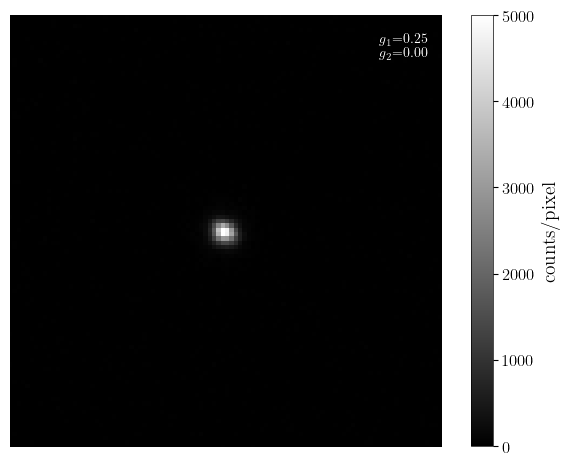

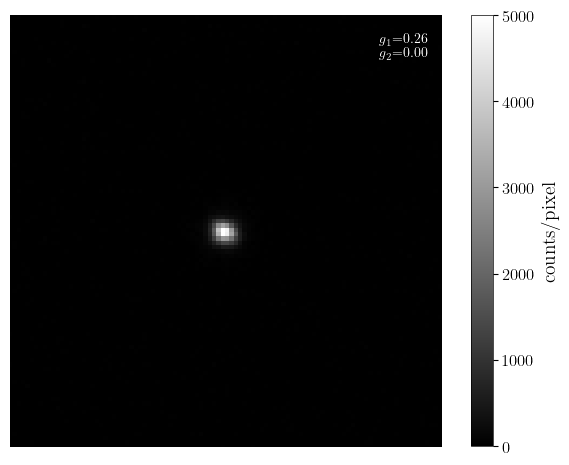

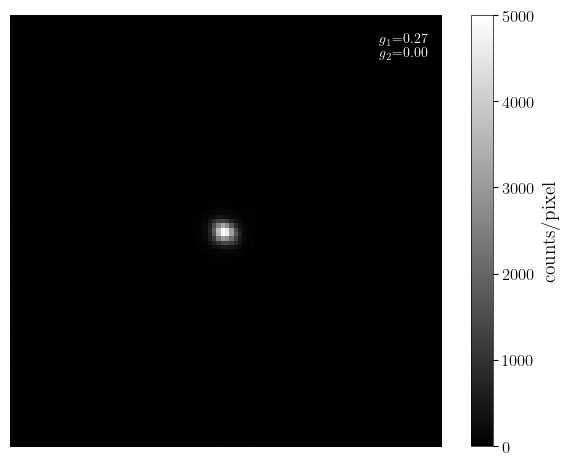

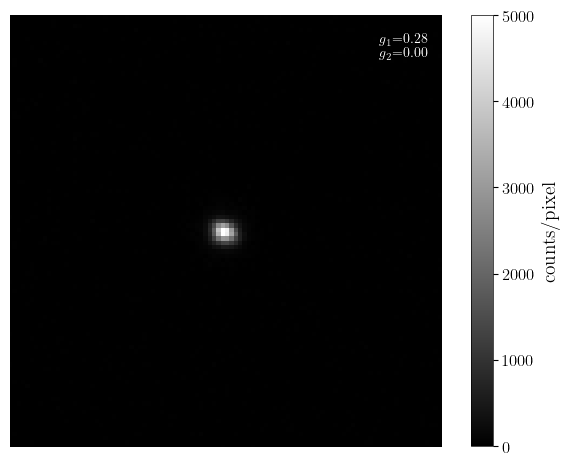

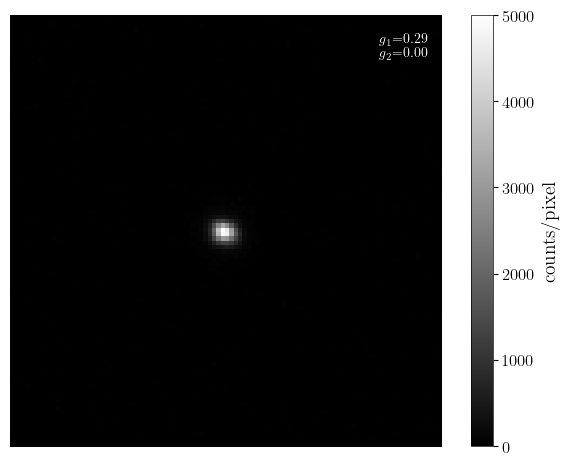

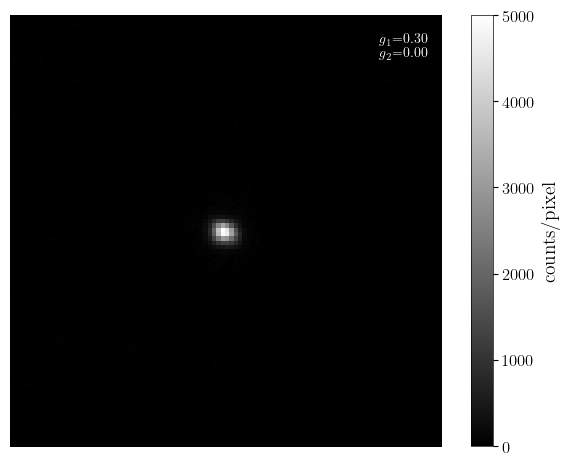

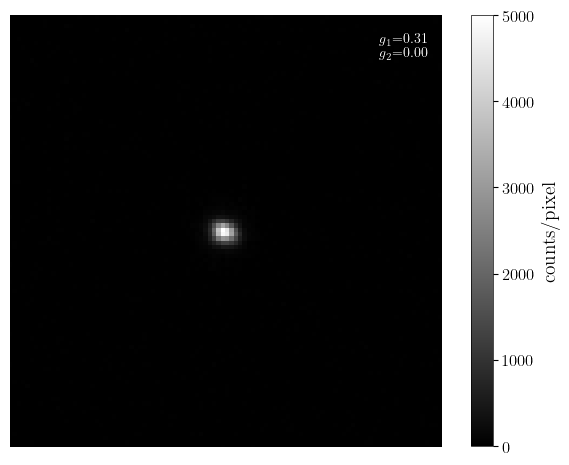

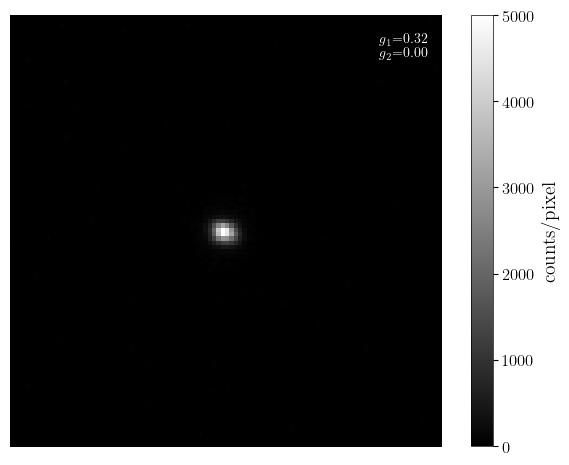

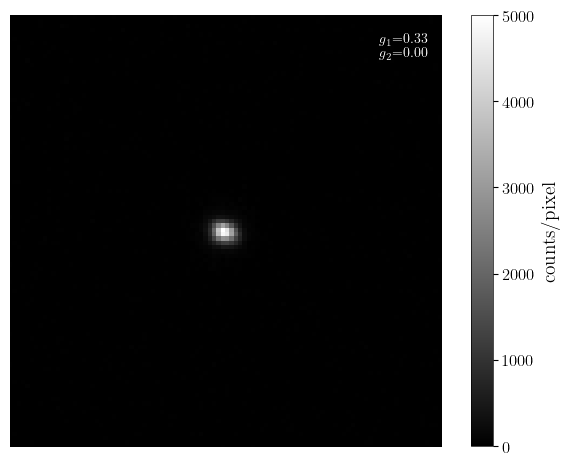

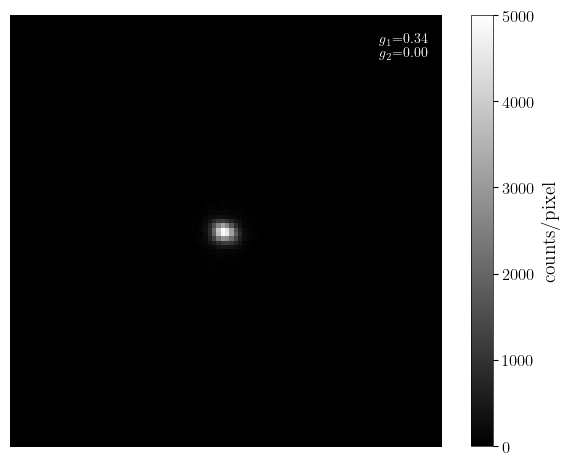

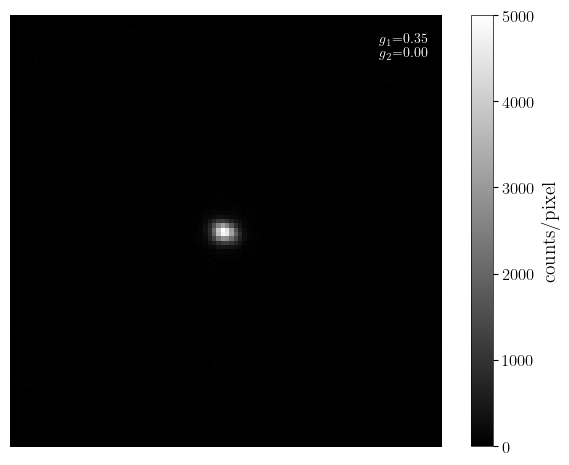

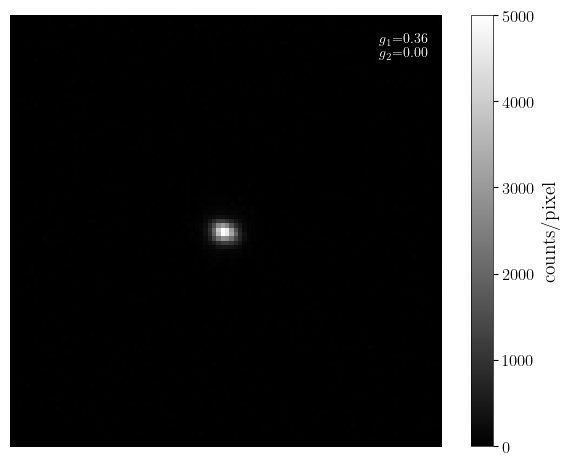

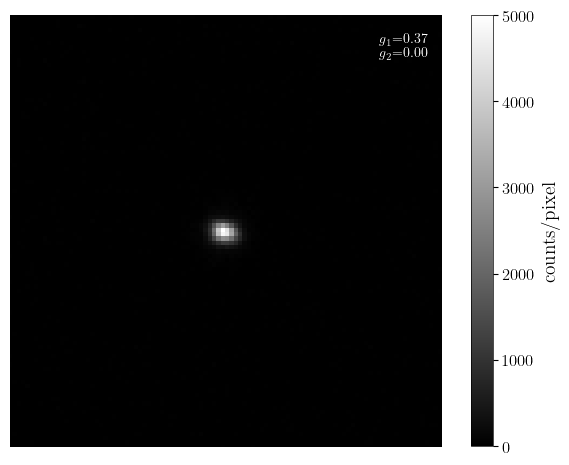

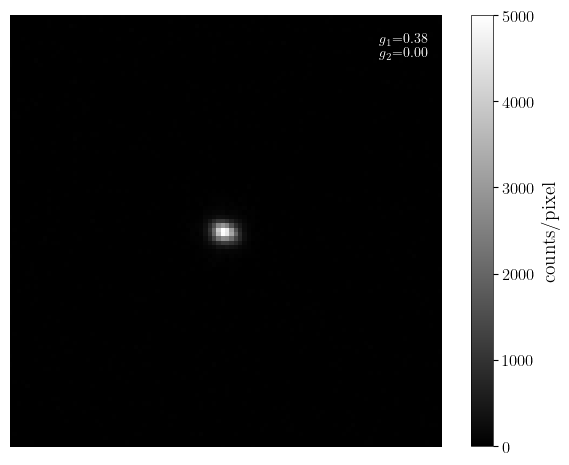

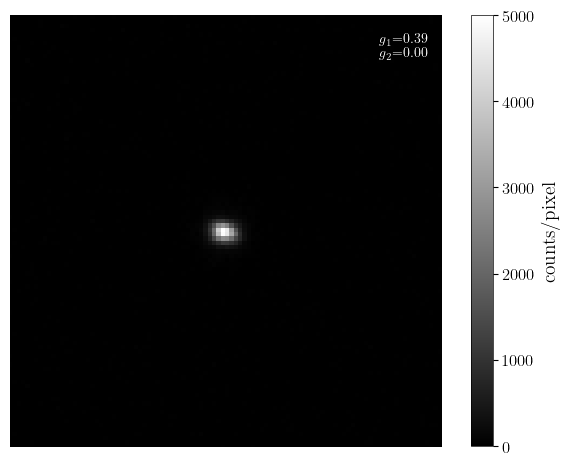

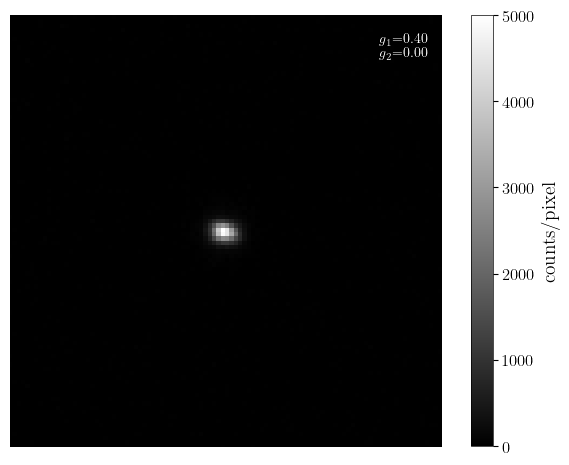

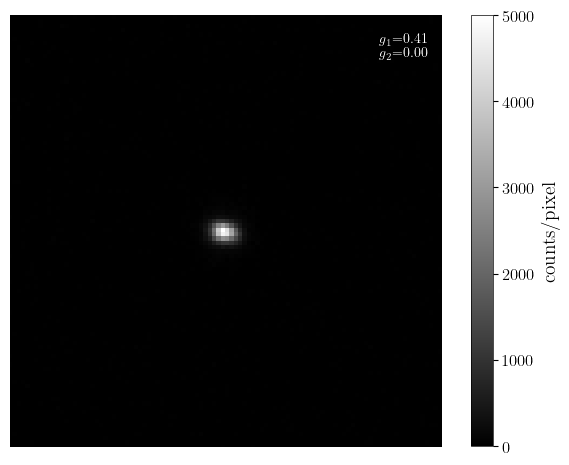

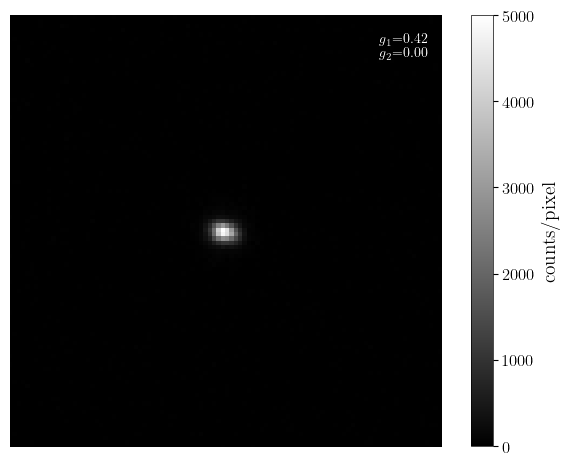

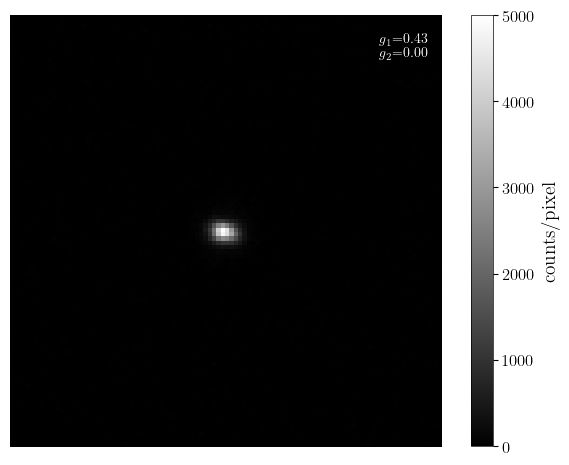

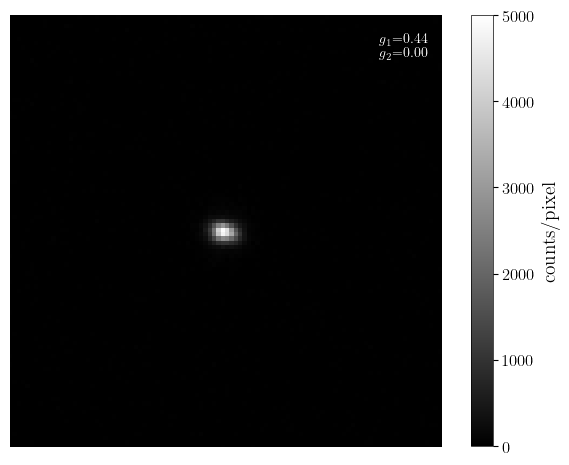

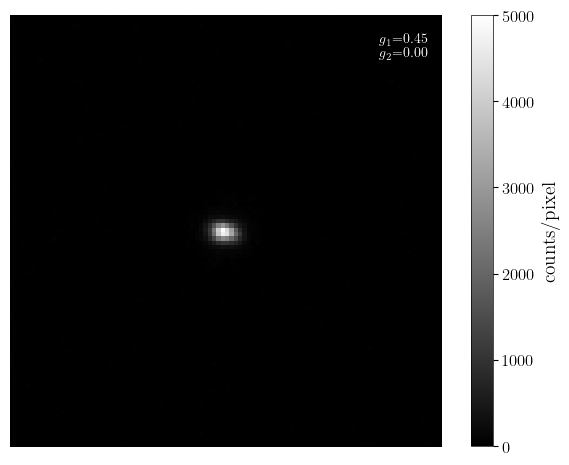

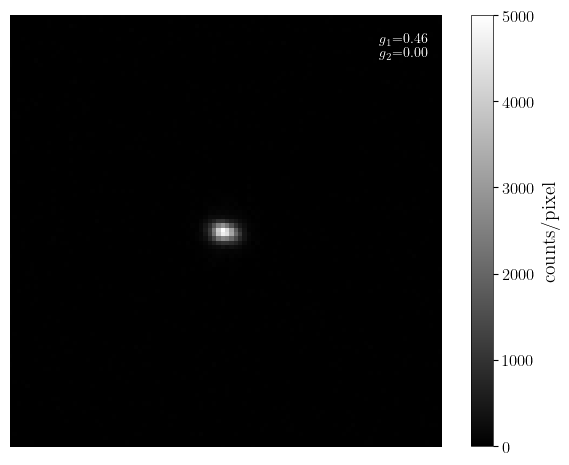

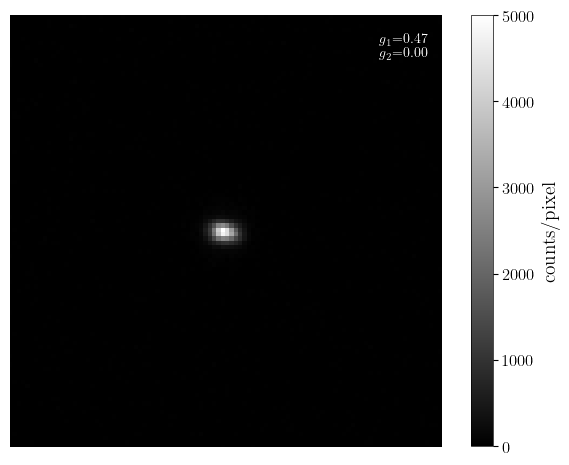

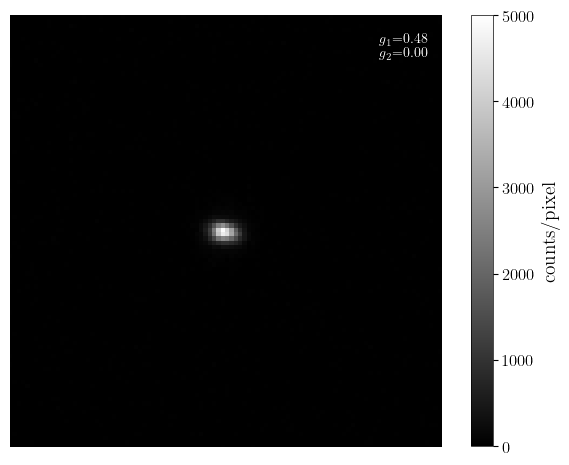

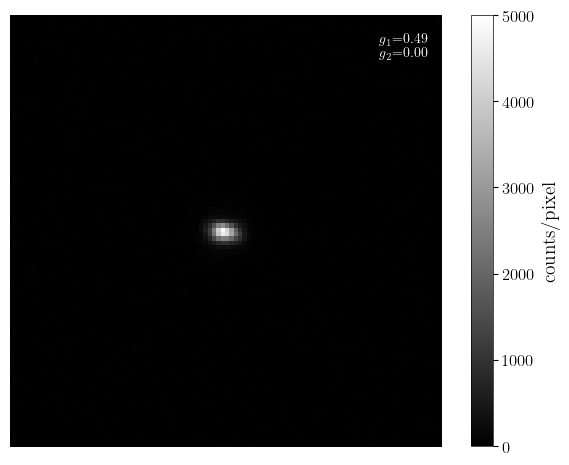

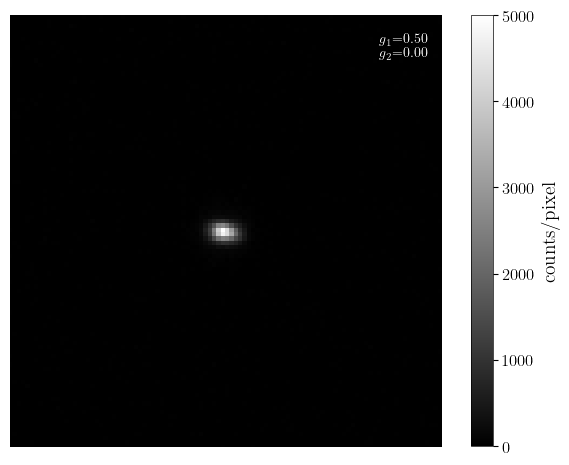

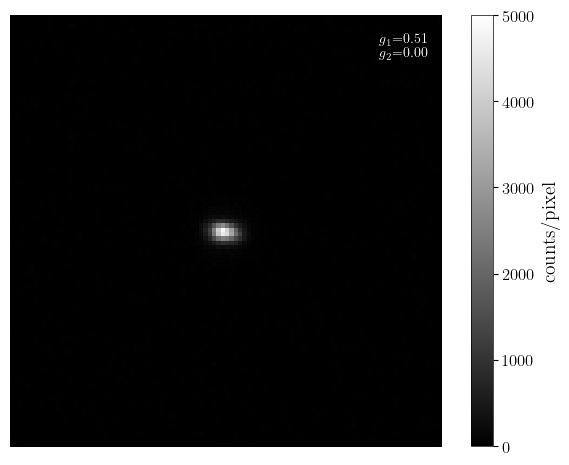

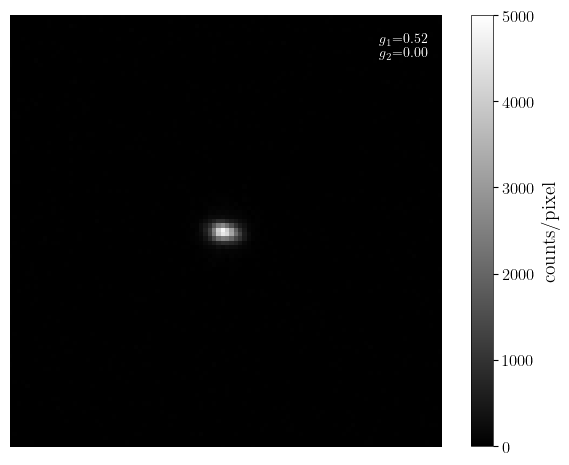

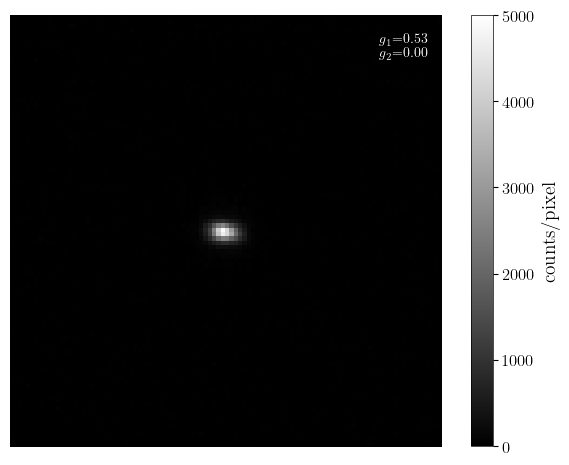

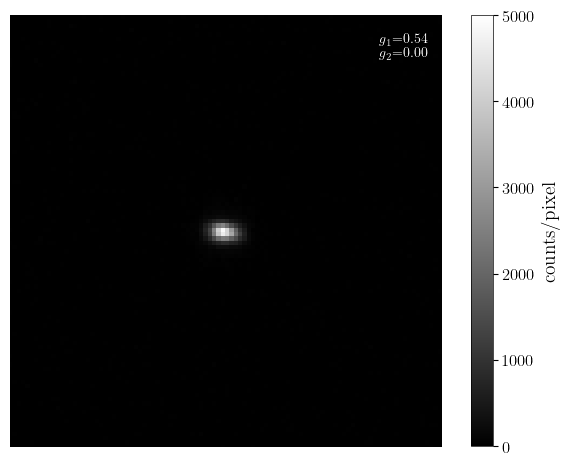

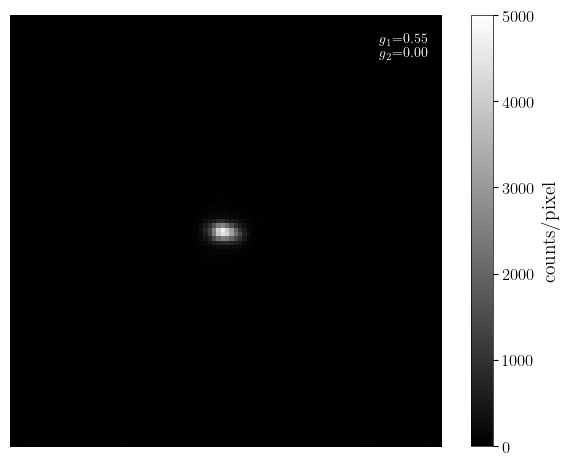

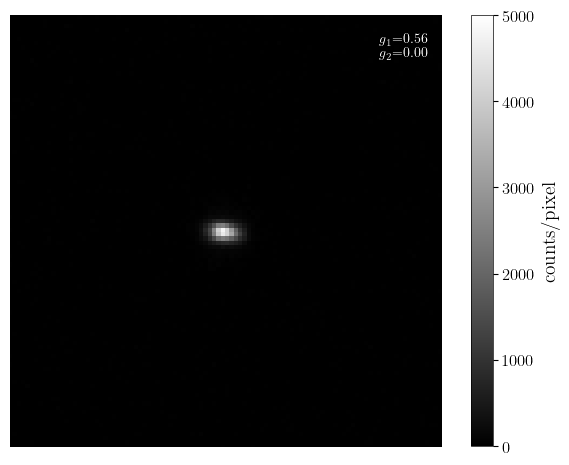

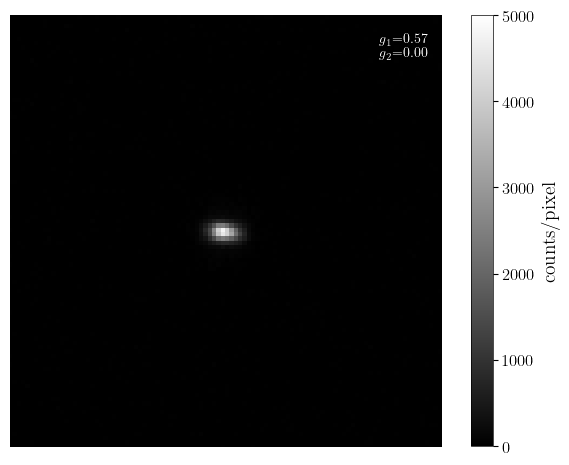

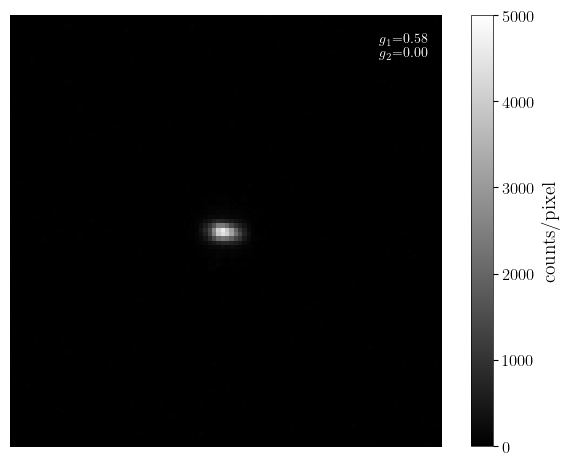

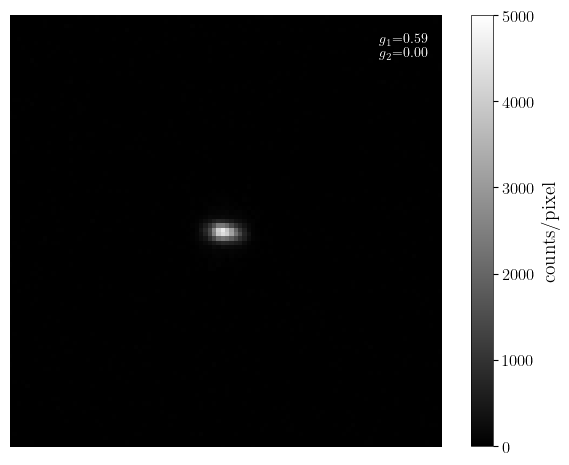

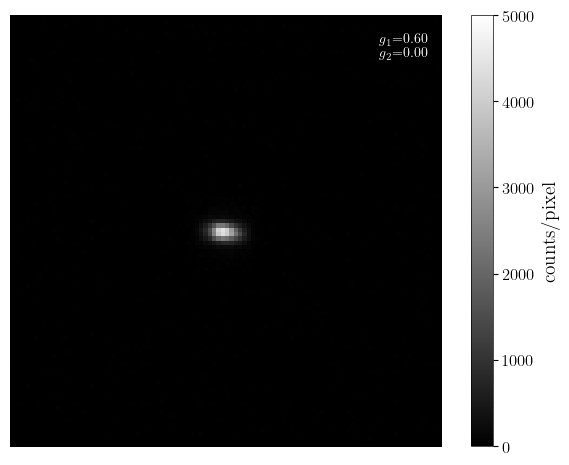

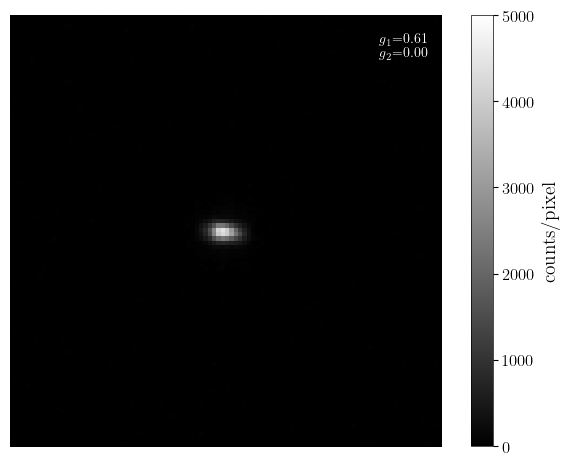

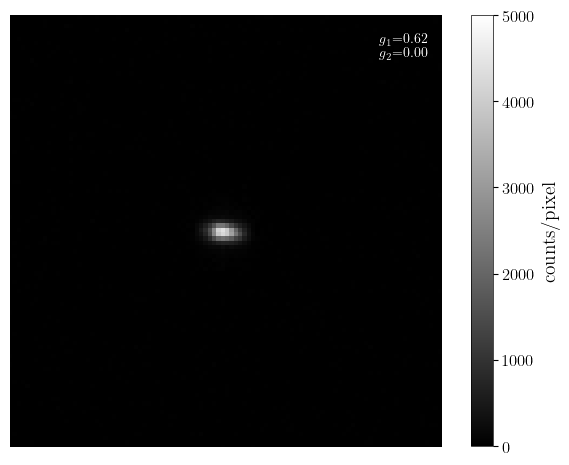

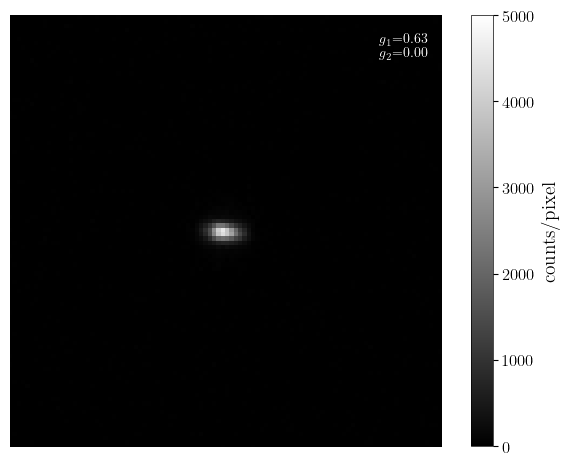

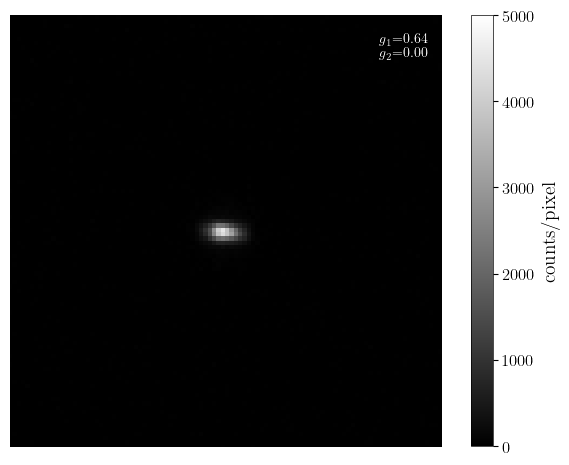

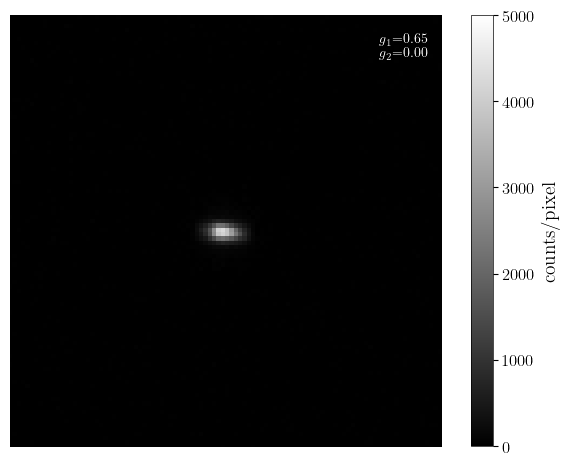

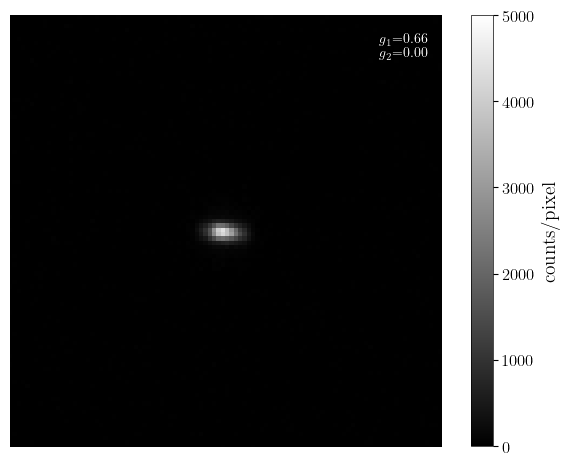

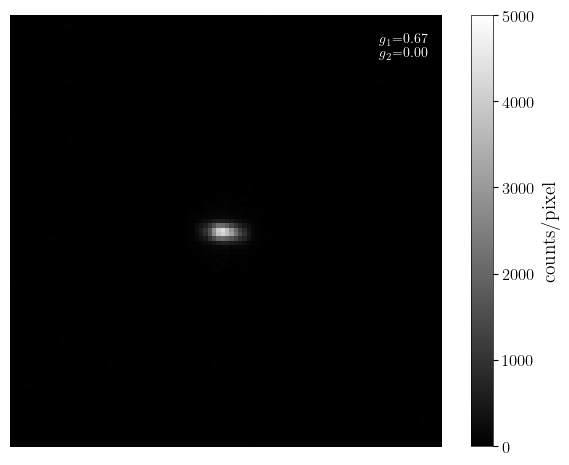

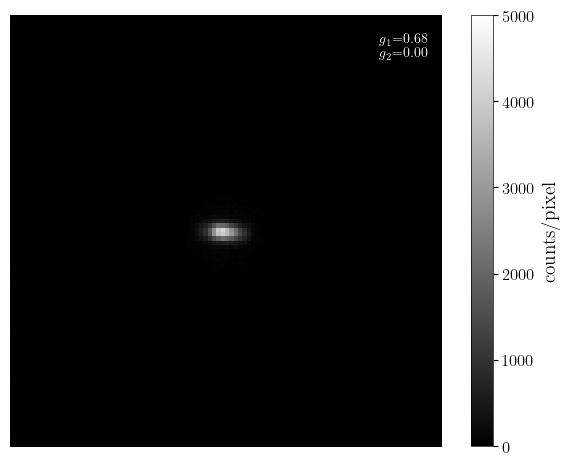

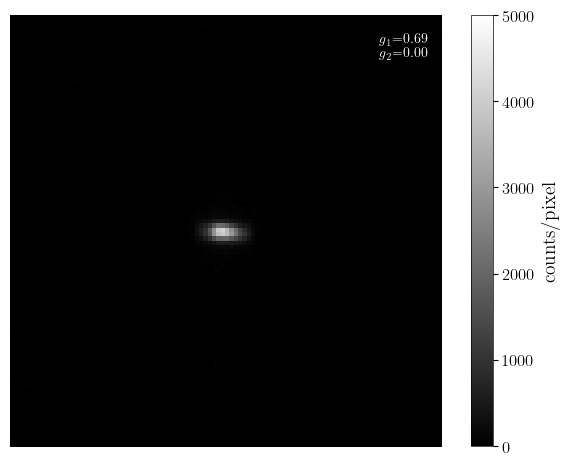

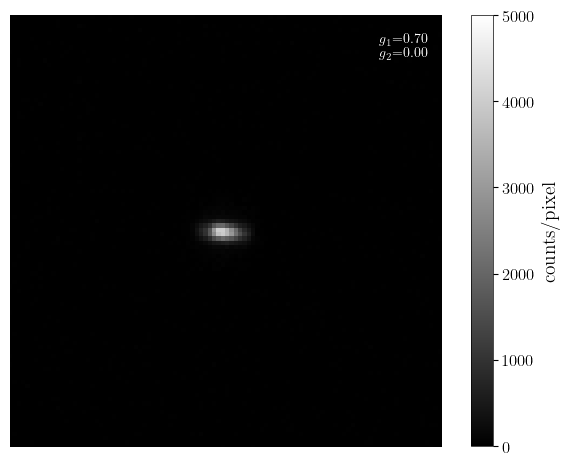

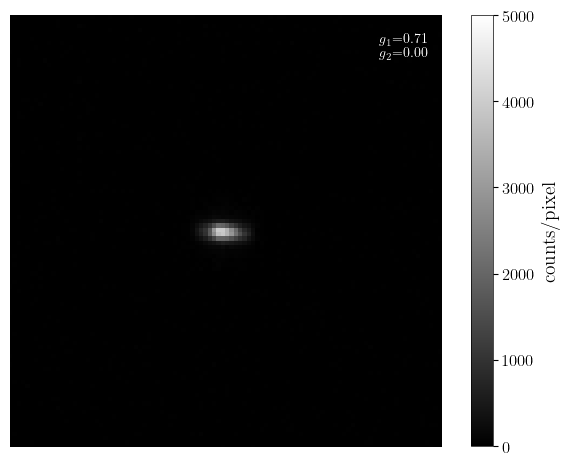

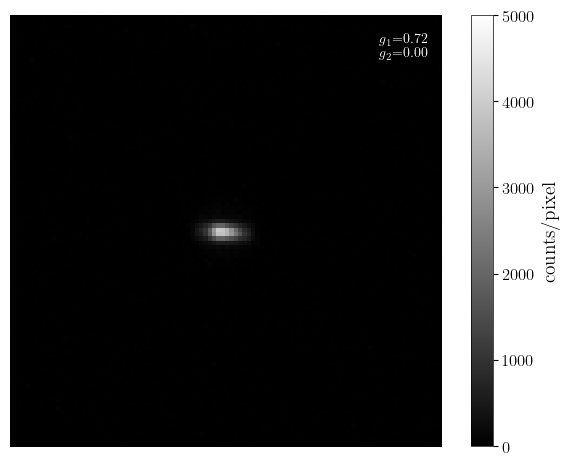

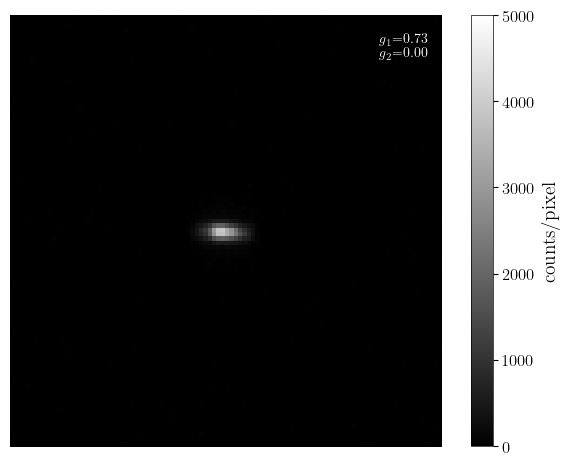

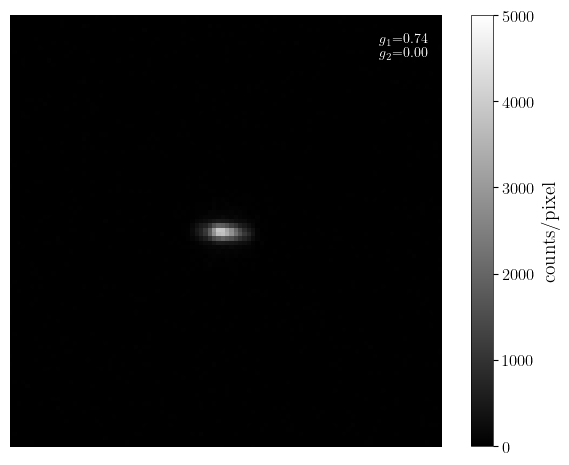

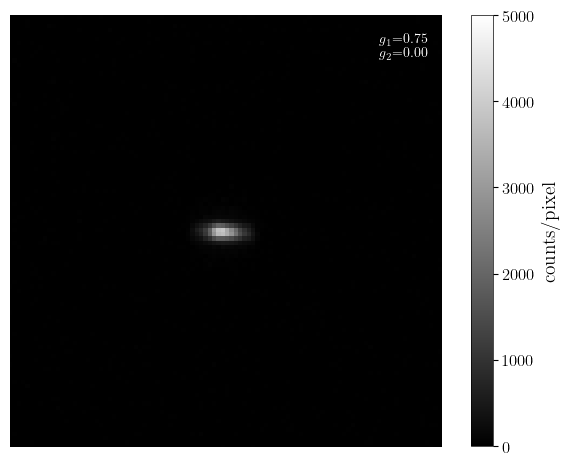

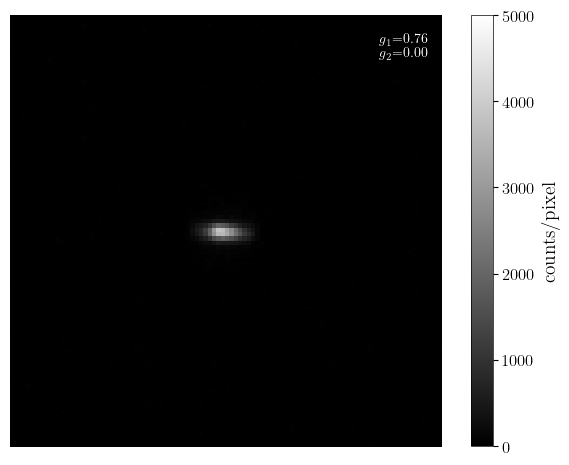

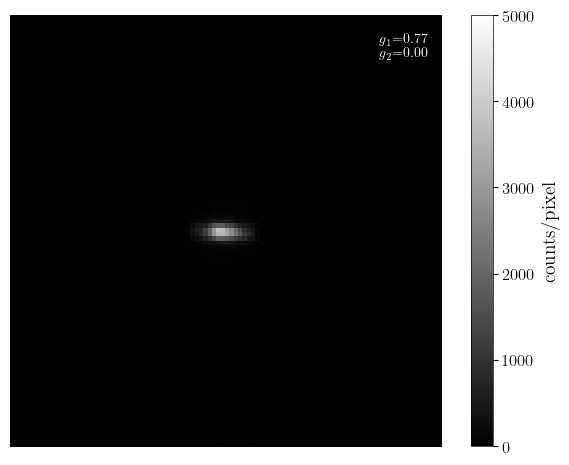

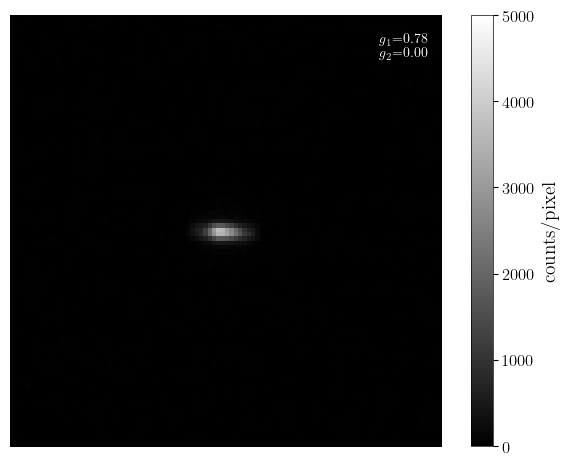

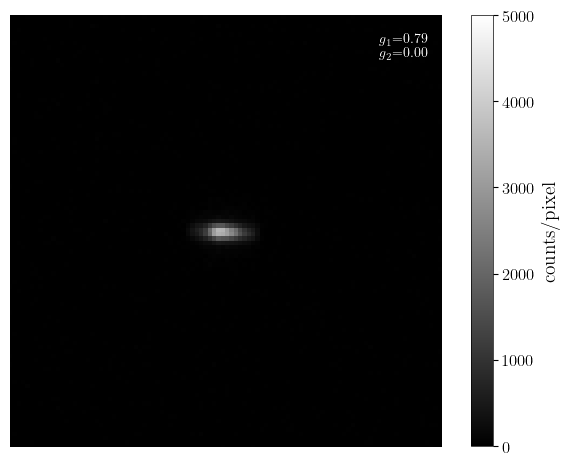

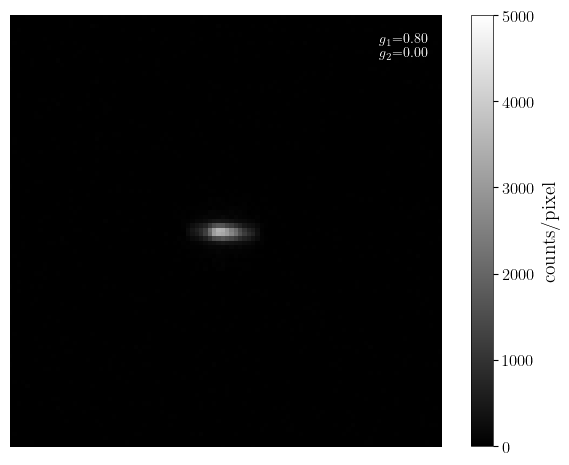

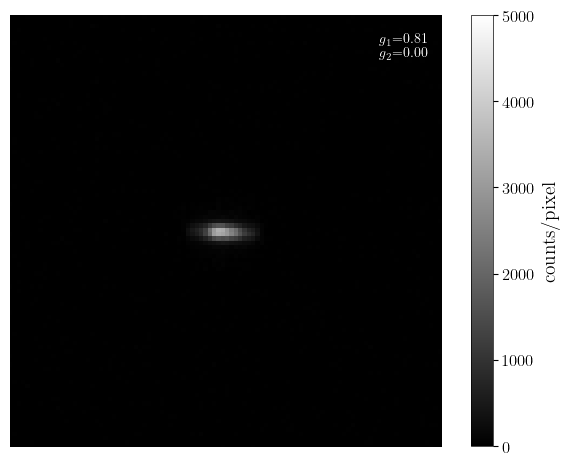

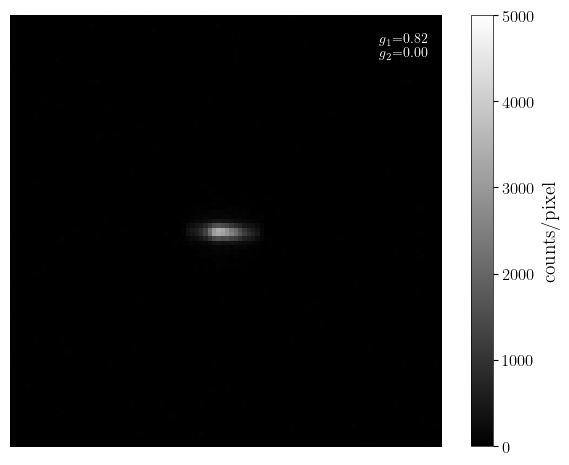

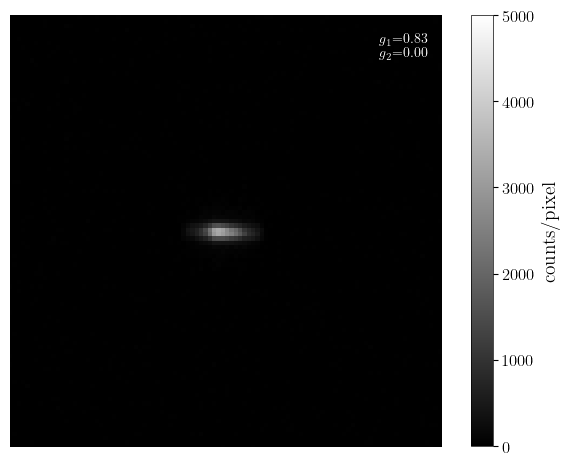

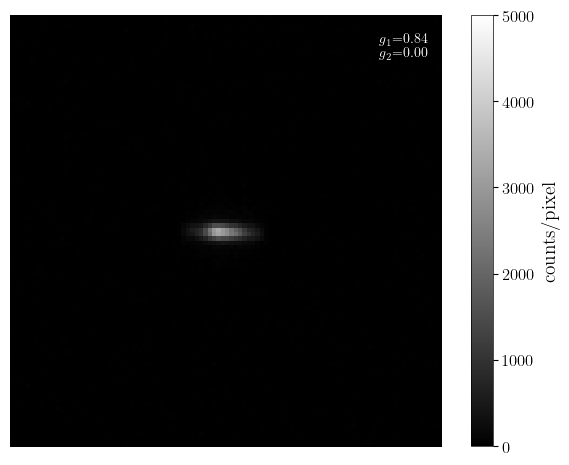

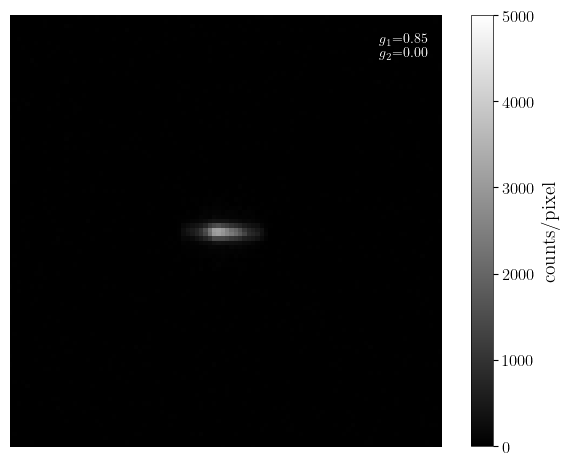

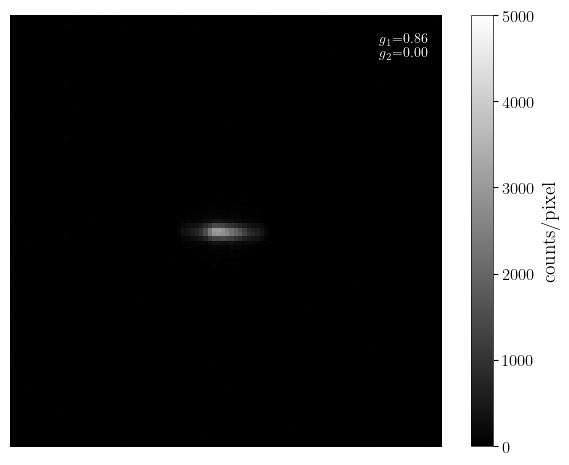

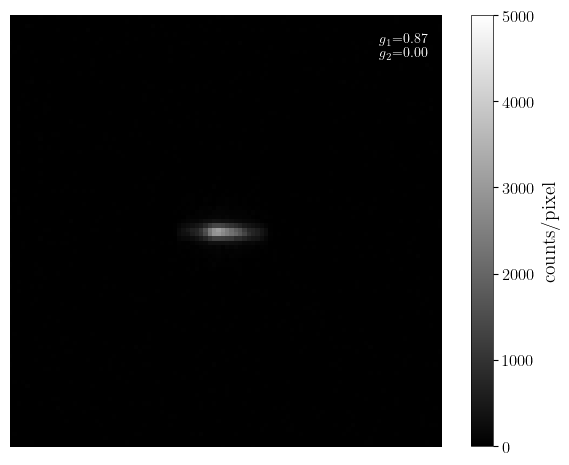

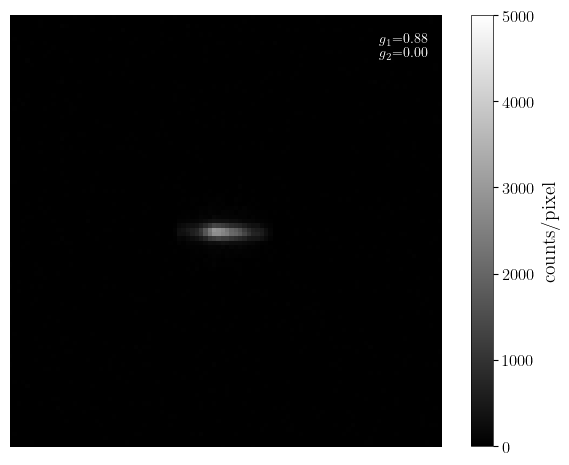

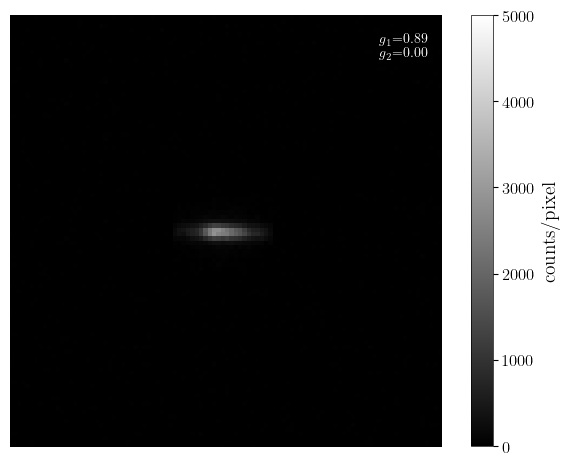

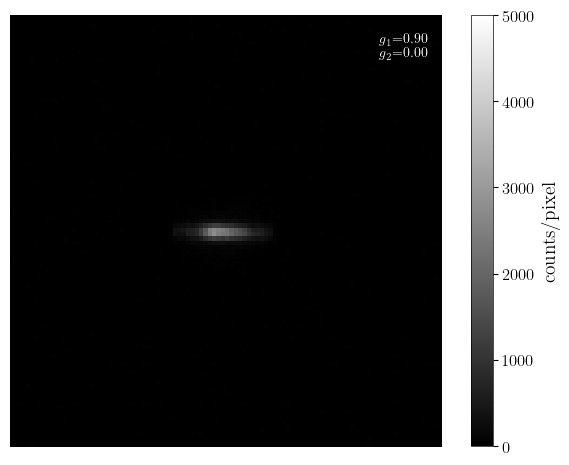

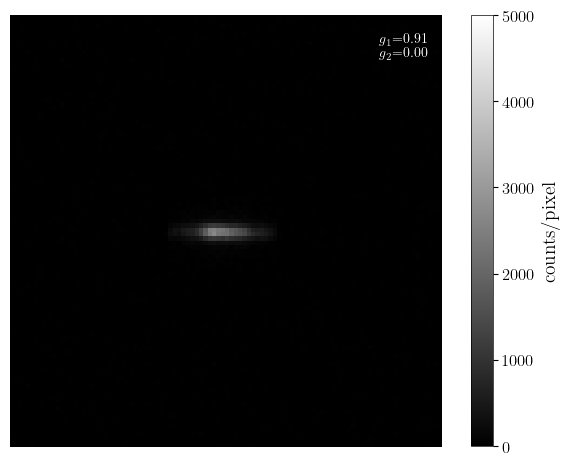

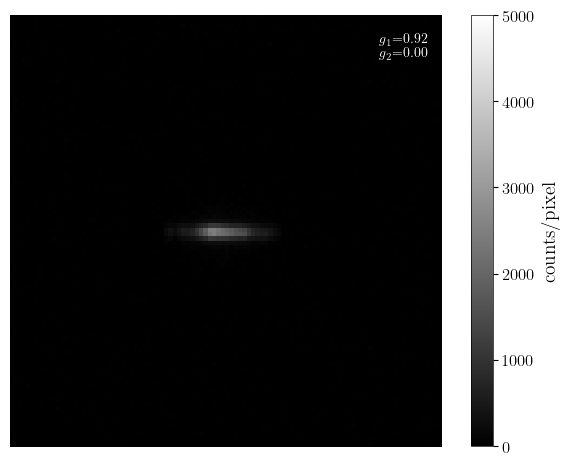

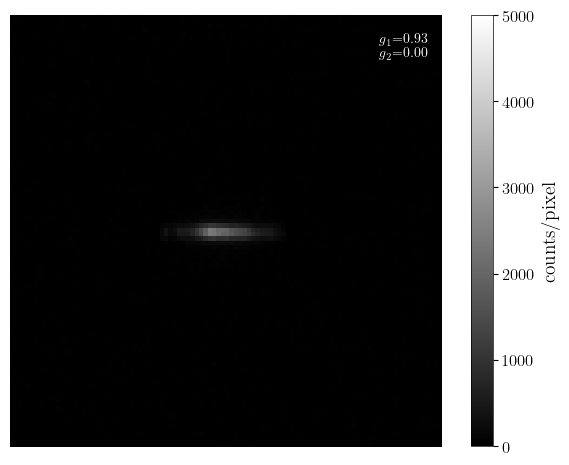

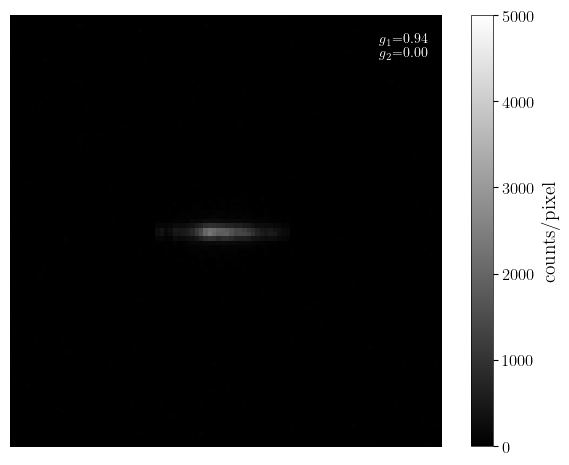

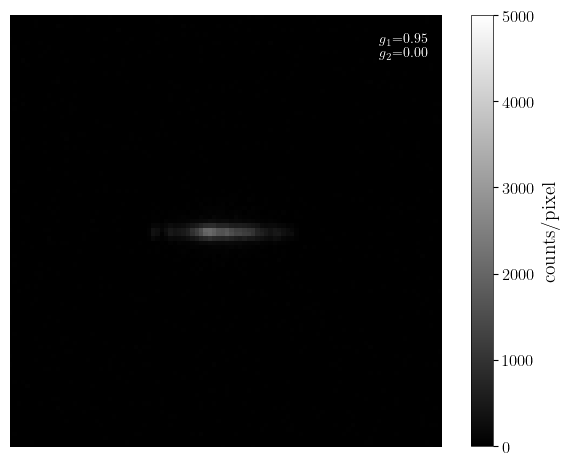

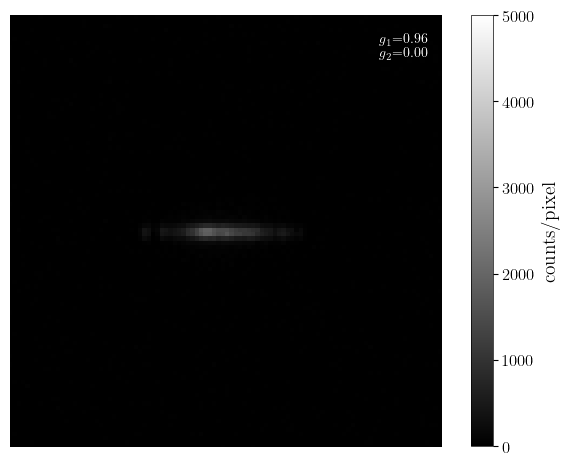

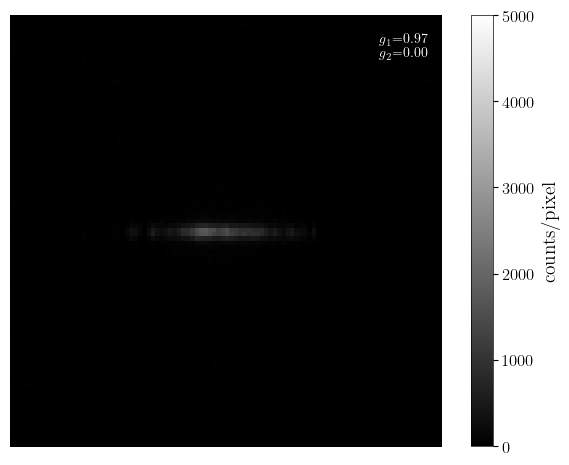

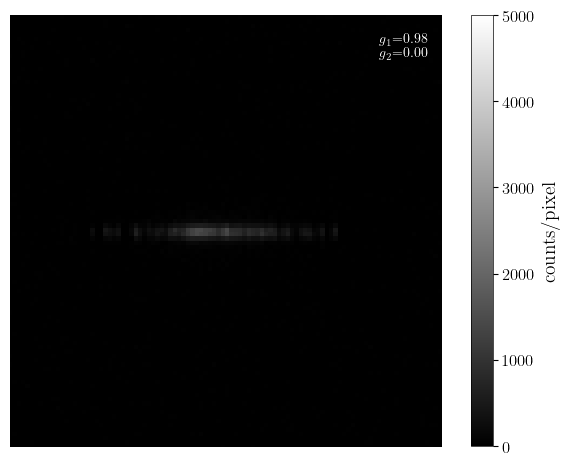

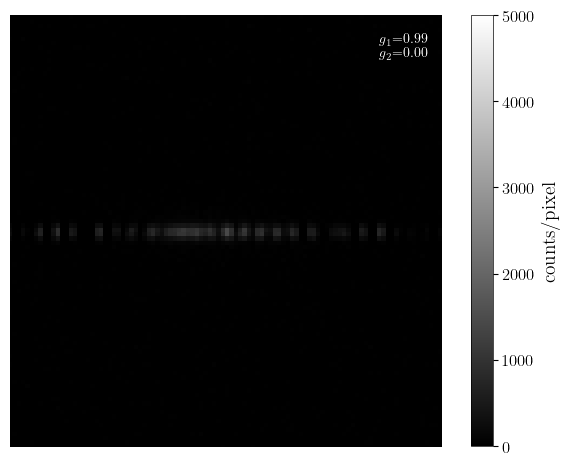

In [4]:
#this function is useful to create the color gradient of the galaxy. It is also possible to use one of matplotlibs' default color maps

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


for i in range(0,100*g1_max):
        
    gal_g1=0.01*i

    image_size_x, image_size_y= 100, 100


    #open a galaxy from the Galsim Real Galaxy Catalog. Check: https://galsim-developers.github.io/GalSim/_build/html/real_gal.html 
    
    path='/home/nina/GalSim/examples/data' #substitute with your path

    real_gal = galsim.RealGalaxyCatalog('real_galaxy_catalog_23.5_example.fits', dir=path)

    #describe the PSF profile:

    psf1= galsim.Gaussian(fwhm=psf_inner_fwhm, flux=psf_inner_fraction)
    psf2= galsim.Gaussian(fwhm=psf_outer_fwhm, flux= psf_outer_fraction)

    psf=psf1 +psf2

    #draw el PSF with no noise:

    psf_image=psf.drawImage(scale=pixel_scale) 

    rng = galsim.BaseDeviate(random_seed+1)

    gal = galsim.RealGalaxy(real_gal, index= index, flux=gal_flux)

    #Apply a shear: 

    gal = gal.shear(g1=gal_g1, g2=gal_g2)

    final=galsim.Convolve([psf,gal])


    # Create an image with the desired size and center the galaxy:
    image = galsim.ImageF(image_size_x, image_size_y, scale=pixel_scale)
    final.drawImage(image=image)

    #add noise

    sky_level_pixel = sky_level * pixel_scale**2
    noise = galsim.PoissonNoise(rng, sky_level=sky_level_pixel)
    image.addNoise(noise)

    #add a color bar:

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",[lighten_color("white", 1), lighten_color('black', 0)])

    #Plot

    plt.figure(figsize=(7,7))
    im=plt.imshow(image.array, cmap='binary_r',vmin=0, vmax=5000)

    plt.text(image_size_x*0.85,image_size_y*0.9, "$g_1$="+str("%0.2f"%gal_g1) + '\n' '$g_2$='+str(format(gal_g2,'.2f')), color='white')
    plt.xlim(0,image_size_x)
    plt.ylim(0,image_size_y)
    cbar=plt.colorbar(shrink=0.8, label='counts/pixel')
    cbar.ax.yaxis.label.set_size(14)
    plt.axis('off')
    #plt.savefig("defg1_%.02f.png" % gal_g1, bbox_inches='tight',dpi=300)
    plt.show()
 